<div style="display: flex; justify-content: center;">
    <img src="../images/Logo-personal_Fondo_blanco.png" alt="Logo_personal" /> 
</div>
<p align="center">
  <h1 align="center">Multivariable linear regression life expectancy and socioeconomic status<h1>
</p>

---

## Introduction
This project aims to generate a multivariable linear regression model to predict life expectancy with social and economic variables from different years and regions of the world. The "Life expectancy & Socio-Economic (world bank)" Dataset was used.

The work is carried out around the analysis, compression, validation, cleaning of the data for its proper use in the training of the model, with the following work path:

- Development
- Understanding the data
- Simple linear regression
  - Adjust null values
  - Create the model
  - Evaluate the model
  - Create predictions
- Multivariable regression
  - Data purification and cleaning
  - Adjust null values
  - Analyze the data
  - Correlation matrix 
  - Convert categorical variables to numeric, with One-hot encoding
  - Model training
  - Evaluating the model
  - Improving the model
  - Dimensionality reduction


## Data
The Data set ["Life expectancy & Socio-Economic (world bank)"](https://www.kaggle.com/datasets/mjshri23/life-expectancy-and-socio-economic-world-bank) of kaggel contains indices of Global life expectancy with Socio-Economic variables 2000-2019

**Columns**
* Country Name
* Country Code
* Region
* IncomeGroup
* Year       
* Life Expectancy World Bank
* Prevelance of Undernourishment
* CO2
* Health Expenditure %
* Education Expenditure %
* Unemployment
* Corruption
* Sanitation
* Injuries 
* Communicable
* NonCommunicable

___


## Development
### Importing Libraries

In [1]:
! pip install --upgrade pip setuptools==57.5.0
! pip install regressors

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import regressors 
import random
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from regressors import stats

print('Imported libraries')

Imported libraries


### Import the dataset

In [3]:
df = pd.read_csv("../data/life_expectancy.csv")
df.sample(5)

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
3304,Zambia,ZMB,Sub-Saharan Africa,Low income,2019,63.886000,NaN,6800.000191,5.312203,4.46518,12.520,2.5,NaN,510982.75,4837094.00,2649687.82
2440,United Arab Emirates,ARE,Middle East & North Africa,High income,2015,77.285000,6.5,195240.005493,3.583594,NaN,1.768,NaN,91.829772,380850.30,120097.10,1379068.24
908,Cuba,CUB,Latin America & Caribbean,Upper middle income,2006,77.864000,2.5,26780.000687,8.271906,9.05717,1.910,NaN,39.230836,318274.92,239484.03,2436353.47
880,Austria,AUT,Europe & Central Asia,High income,2006,79.880488,2.5,74099.998474,9.531133,5.22652,5.240,NaN,99.661090,231352.73,75740.57,2099786.94
2597,Tuvalu,TUV,East Asia & Pacific,Upper middle income,2015,NaN,NaN,10.000000,16.699593,NaN,NaN,3.5,6.174529,462.59,638.84,3133.87


### Understanding the data

In [4]:
df.shape

(3306, 16)

Since linear regressions are performed with correlated variables, it is necessary to see the correlations between the variables

Text(0.5, 1.0, 'Correlation matrix of numerical variables')

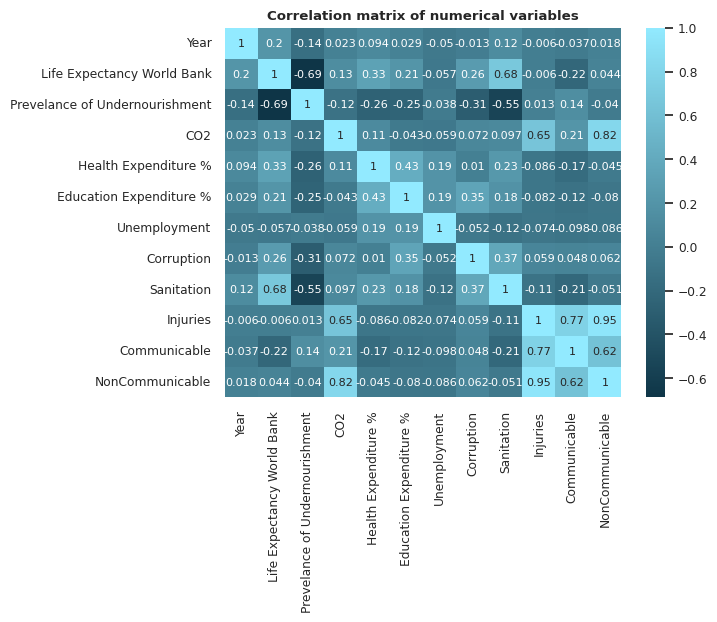

In [5]:
# Numerical variables
colum_num = df.select_dtypes(include=['int64', 'float64']).columns

colors = ["#0E3547", "#92EAFF"]
cmap = LinearSegmentedColormap.from_list('Custom', colors, N=256)

sns.set(style="whitegrid", context="notebook", font_scale=0.8)
sns.heatmap(df[colum_num].corr(), cbar = True, cmap = cmap, annot=True, annot_kws={"size": 8})
plt.title("Correlation matrix of numerical variables", fontweight='bold')

The variables with the highest correlation:
- Prevalence of Undernourishment
- Life Expectancy World Bank

Text(0.5, 1.0, 'Correlation between Undernourishment and Life expectancy')

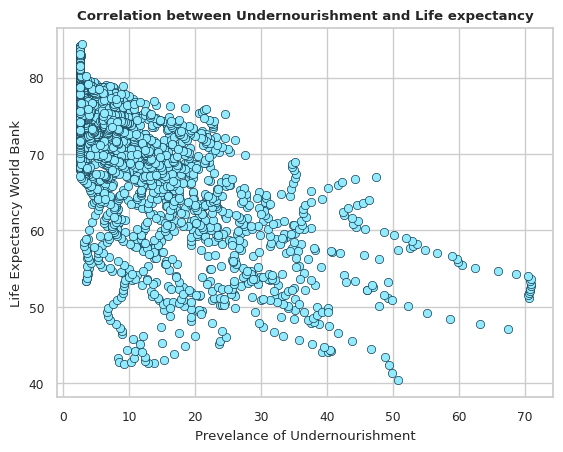

In [6]:
sns.scatterplot(data=df, x=df["Prevelance of Undernourishment"], y=df["Life Expectancy World Bank"], color = colors[1], edgecolor=colors[0])
plt.title("Correlation between Undernourishment and Life expectancy", fontweight='bold')

___
### Simple linear regression

In [7]:
df["Prevelance of Undernourishment"].isnull().sum()

684

In [8]:
df["Life Expectancy World Bank"].isnull().sum()

188

#### Adjust null values
Replacing the null values with the mean of each variable segmented by the "region" variable, avoiding increasing the bias of the variables

In [9]:
df_2 = df.copy()

mean_undernourishment_by_region = df_2.groupby("Region")["Prevelance of Undernourishment"].transform("mean")
df_2["Prevelance of Undernourishment"].fillna(mean_undernourishment_by_region, inplace = True)
df_2["Prevelance of Undernourishment"].isnull().sum()

0

In [10]:
mean_life_expectancy = df_2.groupby("Region")["Life Expectancy World Bank"].transform("mean")
df_2["Life Expectancy World Bank"].fillna(mean_life_expectancy, inplace = True)
df_2["Life Expectancy World Bank"].isnull().sum()

0

In [11]:
X_col = df_2[["Prevelance of Undernourishment"]]
y_col = df_2[["Life Expectancy World Bank"]]
X_col.shape

(3306, 1)


Split training and test data

In [12]:
X_train, X_test, y_train, y_test =  train_test_split(X_col, y_col)

Standardize data

In [13]:
X_col = X_col.values.reshape(-1, 1)  # Convierte a una matriz 2D
y_col = y_col.values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)


In [14]:
print("X_train: {}".format(X_train.shape[0]),
      "X_test: {}".format(X_test.shape[0]), sep = "\n")

X_train: 2479
X_test: 827


### Create the model

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Make predictions

In [16]:
y_pred = model.predict(X_test)
y_pred.shape

(827, 1)

### Evaluate the model

**Mean Squared Error**

In [17]:
mse = metrics.mean_squared_error(y_test, y_pred)

**Determination coefficient R**

In [18]:
r2 = metrics.r2_score(y_test, y_pred)

In [19]:
print("mse:", mse.round(4))
print("r2:", r2.round(4))

mse: 0.5362
r2: 0.4638


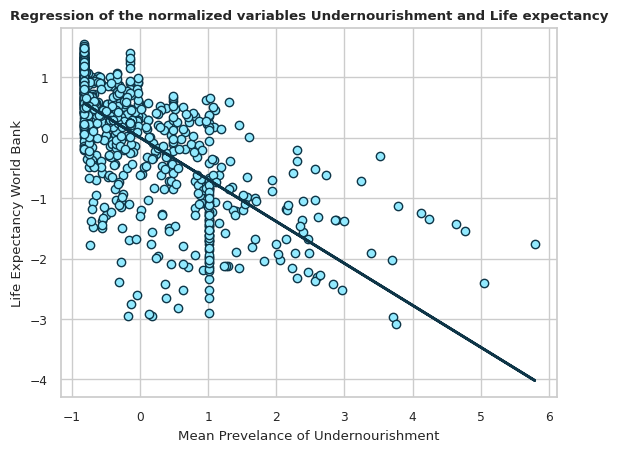

In [20]:
plt.scatter(x=X_test, y=y_test, color = colors[1], edgecolor=colors[0] )
plt.plot(X_test, y_pred, color= colors[0], linewidth=2)
plt.xlabel("Mean Prevelance of Undernourishment")
plt.ylabel("Life Expectancy World Bank")
plt.title("Regression of the normalized variables Undernourishment and Life expectancy", fontweight="bold");

#### Create predictions
Random value to predict within the range of the independent variable

In [21]:
mean = np.mean(df_2["Prevelance of Undernourishment"])
std = np.std(df_2["Prevelance of Undernourishment"])

value_undernourishment = np.random.normal(mean, std)
value_undernourishment

8.210693820215699

In [22]:
value_undernourishment_scl = sc_x.transform(np.array([value_undernourishment]).reshape(-1,1))
value_undernourishment_scl 

/home/williamccs/miniconda3/envs/cookiecutter-personal/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.27375418]])

Do the inverse transform

In [23]:
pred_life_expectancy = sc_y.inverse_transform(model.predict(value_undernourishment_scl))[0,0]
print("For a country with a prevalence of malnutrition of {}% the life expectancy is {} years".format(np.round(value_undernourishment, 2),
       np.round(pred_life_expectancy, 2)))

For a country with a prevalence of malnutrition of 8.21% the life expectancy is 71.61 years


___
## Multivariable regression

### Data purification and cleaning

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    3306 non-null   object 
 1   Country Code                    3306 non-null   object 
 2   Region                          3306 non-null   object 
 3   IncomeGroup                     3306 non-null   object 
 4   Year                            3306 non-null   int64  
 5   Life Expectancy World Bank      3118 non-null   float64
 6   Prevelance of Undernourishment  2622 non-null   float64
 7   CO2                             3154 non-null   float64
 8   Health Expenditure %            3126 non-null   float64
 9   Education Expenditure %         2216 non-null   float64
 10  Unemployment                    3002 non-null   float64
 11  Corruption                      975 non-null    float64
 12  Sanitation                      20

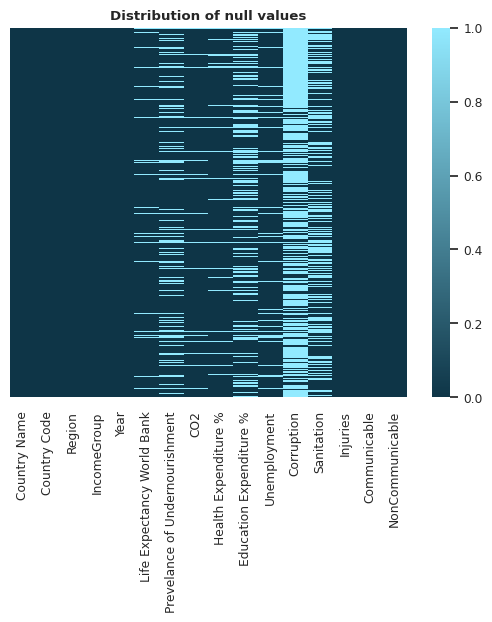

In [69]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap=cmap)
plt.title("Distribution of null values", fontweight="bold")
plt.show()

The variables with the greatest number of Null values in order:
- Corruption
- Sanitation
- Education Expenditure %
- Prevelance of Undernourishment
- Unemployment

#### Adjust null values
##### Variable "Corruption"
Replacing the null values with the mean of each variable segmented by the "region" variable, avoiding increasing the bias of the variables

In [26]:
df_3 = df.copy()

def replace_values_null_by_Region (var, df):
    """
    Function that replaces null values with the mean of the variable segmented by the "region" variable
    
    Arguments:
    var = Variable to replace null values
    df = Data frame
    
    Returns:
    val_null = Check if there are null values in the variables
    """
    mean =  df.groupby("Region")[var].transform("mean")
    df[var].fillna(mean, inplace = True)
    val_null = df[var].isnull().sum()
    print("Null values in the cleaned variable:", val_null) 
    
replace_values_null_by_Region(var = "Corruption", df = df_3)

Null values in the cleaned variable: 57


The records for the "North America" Region do not identify values for the "Corruption" variable. It is decided to replace it with the average value of a Region with similar life expectancy indices.

In [27]:
df_3.groupby("Region")["Life Expectancy World Bank"].mean()

Region
East Asia & Pacific           72.048998
Europe & Central Asia         76.182598
Latin America & Caribbean     73.588976
Middle East & North Africa    74.605994
North America                 79.686498
South Asia                    68.527579
Sub-Saharan Africa            57.542669
Name: Life Expectancy World Bank, dtype: float64

The "Europe & Central Asia" Region has the closest life expectancy rate to the "North America" region. Replace the mean of the "Corruption" variable of the "Europe & Central Asia" Region into the "North America" Region.

In [28]:
corruption_EU =  df_3[df_3["Region"] == "Europe & Central Asia"]["Corruption"].mean()
df_3["Corruption"].fillna(corruption_EU, inplace = True)
df_3["Corruption"].isnull().sum()

0

In [29]:
def validate_deleted_records(df):
    df_c = df.copy()
    df_c = df_c.dropna()
    print("Raw data frame:", df.shape[0])
    print("Clean data:", df_c.shape[0])

validate_deleted_records(df = df_3)

Raw data frame: 3306
Clean data: 1296


Observe if the same qualities have been maintained between the original data and the included records

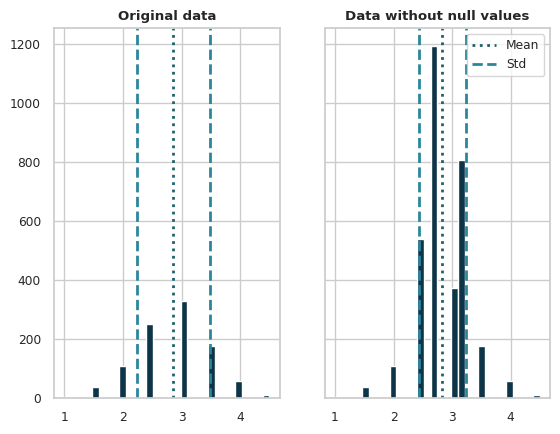

In [30]:
def fig_plot_data_comparison(var, df_i, df_e):
    fig, ax = plt.subplots(1, 2, sharey=True)
    ax[0].hist(df_i[var], bins=30, color = colors[0])
    ax[0].axvline(df_i[var].mean(), color = "#206170", linestyle="dotted", linewidth=2, label="Mean")
    ax[0].axvline(df_i[var].mean() - df_i[var].std(), color="#2A869B", linestyle="dashed", linewidth=2, label="Std")
    ax[0].axvline(df_i[var].mean() + df_i[var].std(), color="#2A869B", linestyle="dashed", linewidth=2)
    ax[0].set_title("Original data", fontweight='bold')

    ax[1].hist(df_e[var], bins=30, color = colors[0])
    ax[1].axvline(df_e[var].mean(), color = "#206170", linestyle="dotted", linewidth=2, label="Mean")
    ax[1].axvline(df_e[var].mean() - df_e[var].std(), color="#2A869B", linestyle="dashed", linewidth=2, label="Std")
    ax[1].axvline(df_e[var].mean() + df_e[var].std(), color="#2A869B", linestyle="dashed", linewidth=2)
    ax[1].set_title("Data without null values", fontweight='bold')
    plt.legend();
    
fig_plot_data_comparison(var = "Corruption", df_i = df, df_e = df_3)

#### Adjust null values
##### Variable "Sanitation"

In [31]:
df["Sanitation"].describe()

count    2059.000000
mean       52.738785
std        30.126762
min         2.377647
25%        24.746007
50%        49.317481
75%        80.278847
max       100.000004
Name: Sanitation, dtype: float64

In [32]:
df_3["Sanitation"].isna().sum()

1247

In [33]:
replace_values_null_by_Region(var = "Sanitation", df = df_3)

Null values in the cleaned variable: 0


In [34]:
validate_deleted_records(df = df_3)

Raw data frame: 3306
Clean data: 1860


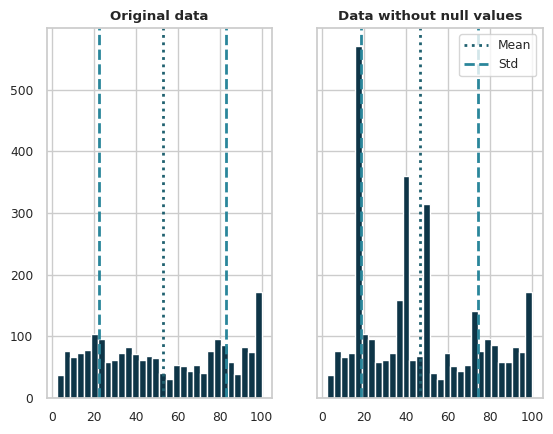

In [35]:
fig_plot_data_comparison(var = "Sanitation", df_i = df, df_e = df_3)

#### Adjust null values
##### Variable "Education Expenditure %"


In [36]:
df["Education Expenditure %"].describe()

count    2216.000000
mean        4.589014
std         2.119165
min         0.850320
25%         3.136118
50%         4.371465
75%         5.519825
max        23.270000
Name: Education Expenditure %, dtype: float64

In [37]:
df_3["Education Expenditure %"].isna().sum()

1090

In [38]:
replace_values_null_by_Region(var = "Education Expenditure %", df = df_3)

Null values in the cleaned variable: 0


In [39]:
validate_deleted_records(df = df_3)

Raw data frame: 3306
Clean data: 2551


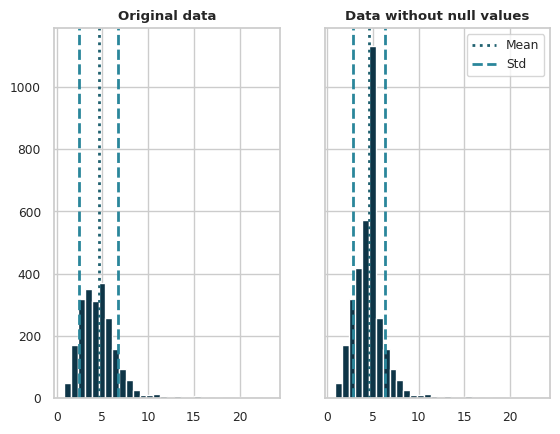

In [40]:
fig_plot_data_comparison(var = "Education Expenditure %", df_i = df, df_e = df_3)

#### Adjust null values
##### Variable "Prevelance of Undernourishment"

In [41]:
df["Prevelance of Undernourishment"].describe()

count    2622.000000
mean       10.663654
std        11.285897
min         2.500000
25%         2.500000
50%         6.200000
75%        14.775000
max        70.900000
Name: Prevelance of Undernourishment, dtype: float64

In [42]:
df_3["Prevelance of Undernourishment"].isna().sum()

684

In [43]:
replace_values_null_by_Region(var = "Prevelance of Undernourishment", df = df_3)

Null values in the cleaned variable: 0


In [44]:
validate_deleted_records(df = df_3)

Raw data frame: 3306
Clean data: 2898


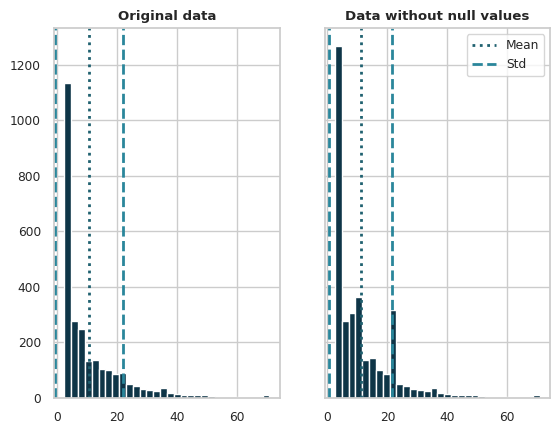

In [45]:
fig_plot_data_comparison(var = "Prevelance of Undernourishment", df_i = df, df_e = df_3)

2898 records of the 3306 have been adjusted, a discrimination is made with respect to the rest of the records with null values that are equivalent to 12.34% of the data set


In [46]:
validate_deleted_records(df = df_3)

Raw data frame: 3306
Clean data: 2898


In [47]:
df_clean = df_3.dropna()
deleted_records = df_3.shape[0] - df_clean.shape[0]
percentage_records = round((deleted_records * 100 / df_3.shape[0]), 2)

print("Total records deleted: {}".format(df_3.shape[0] - df_clean.shape[0]),
      "Percentage of records deleted: {}%".format(percentage_records), sep="\n")

Total records deleted: 408
Percentage of records deleted: 12.34%


___
### Analyze the data
It begins by recognizing how the data of the predictor variable is distributed.

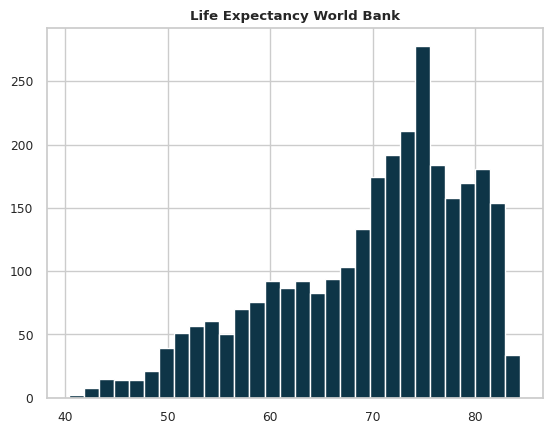

In [48]:
plt.hist(df_clean["Life Expectancy World Bank"], bins=30, color=colors[0])
plt.title("Life Expectancy World Bank", fontweight='bold');


Understand correlations between numerical variables to select additional variables

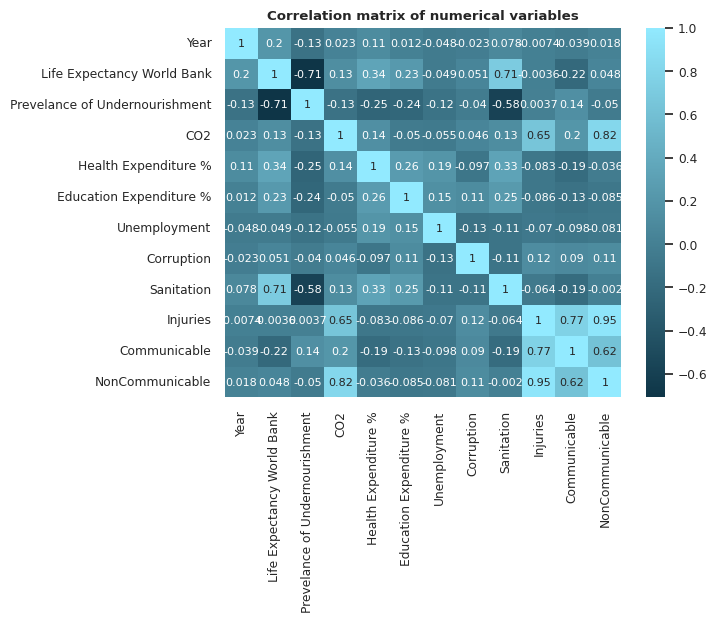

In [49]:
sns.set(style="whitegrid", context="notebook", font_scale=0.8)
sns.heatmap(df_clean[colum_num].corr(), cbar = True, cmap = cmap, annot=True, annot_kws={"size": 8})
plt.title("Correlation matrix of numerical variables", fontweight='bold');

___
### Convert categorical variables to numeric, with **One-hot encoding**

In [50]:
colum_cat = df_clean.select_dtypes(include=['object']).columns
colum_cat

Index(['Country Name', 'Country Code', 'Region', 'IncomeGroup'], dtype='object')

The variables "Region" and "IncomeGroup" are normalized as they have few categories and the categories "Country Name" and "Country Code" are isolated.

In [51]:
df_clean = df_clean.drop(["Country Name", "Country Code"], axis=1)
df_clean = pd.get_dummies(df_clean, columns=["Region", "IncomeGroup"], drop_first = True ) *1
df_clean.sample(5)

,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,...,NonCommunicable,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa,IncomeGroup_Low income,IncomeGroup_Lower middle income,IncomeGroup_Upper middle income
3204,2019,69.656000,14.6,2.456300e+06,3.014147,4.407230,5.270000,2.986364,43.904290,53563909.73,...,2.710974e+08,0,0,0,0,1,0,0,1,0
973,2006,79.439024,2.5,2.650000e+03,8.809920,4.786771,6.800000,2.500000,91.867975,8721.39,...,9.546286e+04,0,0,1,0,0,0,0,0,0
376,2003,44.182000,40.6,2.300000e+02,4.397202,1.539800,5.811000,2.731373,19.540257,307254.75,...,7.769047e+05,0,0,0,0,0,1,1,0,0
1189,2007,73.631707,2.5,5.146000e+04,9.370013,4.209840,18.059999,2.646341,20.443137,323246.04,...,3.080110e+06,1,0,0,0,0,0,0,0,1
730,2005,52.760000,15.9,5.020000e+03,4.095445,2.656520,4.400000,2.500000,15.668302,706338.00,...,2.906555e+06,0,0,0,0,0,1,0,1,0


___
## Model training
Separate the predictive feature from the other columns

In [52]:
X_cols = list(set(df_clean.columns)- set(["Life Expectancy World Bank"]))
y_col = ["Life Expectancy World Bank"]
X_cols[:2]

['Health Expenditure %', 'Year']

Define the X and Y variables:

In [53]:
X = df_clean[X_cols].values
y = df_clean[y_col].values
X

array([[4.48351622e+00, 2.00100000e+03, 4.00400019e+00, ...,
        2.66351634e+06, 1.56683017e+01, 4.00099414e+00],
       [7.13952398e+00, 2.00100000e+03, 1.85750008e+01, ...,
        5.32324750e+05, 4.05208953e+01, 3.45869994e+00],
       [2.48437047e+00, 2.00100000e+03, 2.49300003e+00, ...,
        4.81740700e+05, 5.83983389e+01, 4.78677054e+00],
       ...,
       [9.10935497e+00, 2.01900000e+03, 2.84699993e+01, ...,
        1.02142619e+07, 1.56683017e+01, 5.91770983e+00],
       [5.31220293e+00, 2.01900000e+03, 1.25200005e+01, ...,
        2.64968782e+06, 1.56683017e+01, 4.46517992e+00],
       [7.70356494e+00, 2.01900000e+03, 4.83300018e+00, ...,
        2.36403148e+06, 2.59635438e+01, 4.00099414e+00]])

Split training and test data

In [54]:
X_train, X_test, y_train, y_test =  train_test_split(X, y)

Standardize data

In [55]:
sc_x = StandardScaler()
sc_y = StandardScaler()
sc_x.fit(X)
sc_y.fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

Create the model

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Data prediction

In [57]:
y_pred = model.predict(X_test)
y_pred.shape

(725, 1)

___
## Evaluating the model

**Mean Squared Error**

In [58]:
mse = metrics.mean_squared_error(y_test, y_pred)

**Determination coefficient R**

In [59]:
r2 = metrics.r2_score(y_test, y_pred)

In [60]:
print("mse:", mse.round(4))
print("r2:", r2.round(4))

mse: 0.1486
r2: 0.8501


#### General summary of results with "stats"
Clean up the intercept and slope data based on how stats receives it:

In [61]:
model.intercept_ = model.intercept_[0] # W0
model.coef_ = model.coef_.reshape(-1) # W1, W2 ..
model.coef_.shape

(20,)

In [62]:
y_test = y_test.reshape(-1)

print("============= Summary===============")
stats.summary(model, X_test, y_test, X_cols)

============= Summary===============
Residuals:
    Min      1Q  Median     3Q    Max
-1.2885 -0.2413 -0.0205 0.2365 1.4951


Coefficients:
                                   Estimate  Std. Error  t value   p value
_intercept                         0.001039    0.014420   0.0721  0.942576
Health Expenditure %               0.114840    0.017558   6.5408  0.000000
Year                               0.162444    0.014911  10.8940  0.000000
Unemployment                      -0.090975    0.016309  -5.5782  0.000000
Region_Europe & Central Asia       0.015089    0.025040   0.6026  0.546956
CO2                               -0.124497    0.042615  -2.9215  0.003592
Prevelance of Undernourishment    -0.204304    0.020555  -9.9393  0.000000
Region_Middle East & North Africa  0.055504    0.018376   3.0204  0.002613
Injuries                           0.072941    0.084999   0.8581  0.391100
Corruption                         0.032302    0.018227   1.7722  0.076779
Region_Sub-Saharan Africa         -

**Check residuals**
* See the relationship between predictions and actual labels
* X axis: predictions

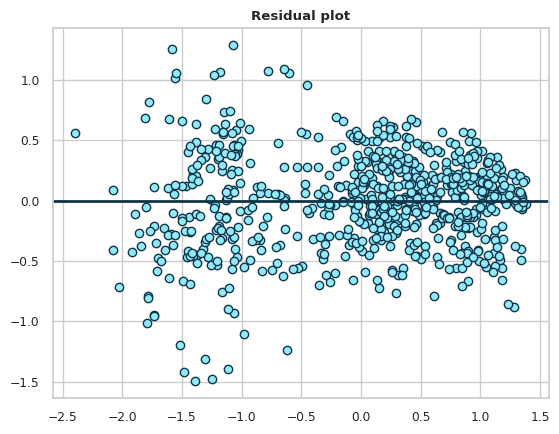

In [63]:
def check_residuals (y_test, y_pred):
    residuals = np.subtract(y_test, y_pred.reshape(-1))
    plt.scatter(y_pred, residuals, color = colors[1], edgecolor=colors[0])
    plt.title("Residual plot", fontweight='bold')
    plt.axhline(0, color = colors[0], linewidth=2)

check_residuals (y_test, y_pred)

___
## Improving the model

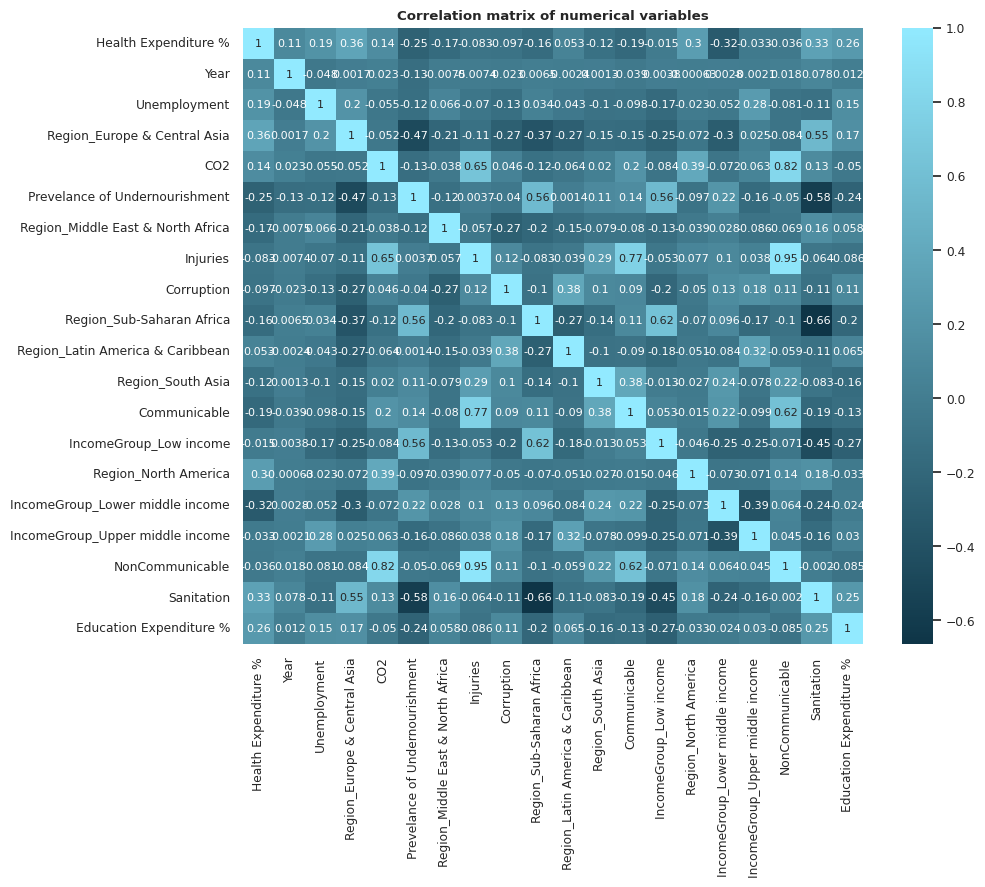

In [64]:
fig, ax = plt.subplots(figsize=(10, 8)) 
sns.heatmap(df_clean[X_cols].corr(), cbar = True, cmap = cmap, annot=True, annot_kws={"size": 8}, ax=ax)
plt.title("Correlation matrix of numerical variables", fontweight='bold');

It is possible to improve the model by creating new variables by performing operations between variables with low p values to increase the weights and their incidences.
* IncomeGroup_Low income   p-value: 0.000000
* Unemployment             p-value: 0.000000

It is hypothesized that when a variable such as "IncomeGroup_Low Income" is present and operating it with the variable "Unemployment" it generates a greater incidence in the model.

In [65]:
df_test = df_clean.copy()
mean_unemployment = df_test["Unemployment"].mean()

df_test["unemployment_low_income"] =   np.where((df_test["Unemployment"] >= mean_unemployment) & (df_test["IncomeGroup_Low income"] == 1), 1, 0) 
df_test["unemployment_low_income"].value_counts()

unemployment_low_income
0    2830
1      68
Name: count, dtype: int64

In [66]:
df_test

,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,...,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa,IncomeGroup_Low income,IncomeGroup_Lower middle income,IncomeGroup_Upper middle income,unemployment_low_income
1,2001,47.059,67.500000,15960.000000,4.483516,4.000994,4.004000,2.731373,15.668302,1392080.71,...,0,0,0,0,0,1,0,1,0,0
2,2001,74.288,4.900000,3230.000000,7.139524,3.458700,18.575001,2.646341,40.520895,117081.67,...,1,0,0,0,0,0,0,0,1,0
4,2001,74.544,2.800000,97200.000000,2.484370,4.786771,2.493000,2.500000,58.398339,144678.14,...,0,0,1,0,0,0,0,0,0,0
5,2001,73.755,3.000000,125260.000000,8.371798,4.833740,17.320000,3.198020,48.053996,1397676.07,...,0,1,0,0,0,0,0,0,1,0
6,2001,71.800,26.100000,3600.000000,4.645627,2.469440,10.912000,2.646341,46.351896,103371.75,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,2019,70.474,12.400000,209.999993,3.360347,1.777880,1.801000,3.000000,51.168487,12484.18,...,0,0,0,0,0,0,0,1,0,0
3302,2019,73.321,4.400000,300.000012,6.363094,4.706250,8.406000,4.000000,47.698788,6652.84,...,0,0,0,0,0,0,0,1,0,0
3303,2019,64.131,6.300000,439640.014648,9.109355,5.917710,28.469999,2.731373,15.668302,3174676.10,...,0,0,0,0,0,1,0,0,1,0
3304,2019,63.886,21.456579,6800.000191,5.312203,4.465180,12.520000,2.500000,15.668302,510982.75,...,0,0,0,0,0,1,1,0,0,1


mse: 0.1563
r2: 0.8352
============= Summary===============
Residuals:
    Min      1Q  Median     3Q    Max
-1.3962 -0.2477   0.001 0.2647 1.5365


Coefficients:
                                   Estimate  Std. Error  t value   p value
_intercept                         0.000915    0.014777   0.0620  0.950616
Health Expenditure %               0.112880    0.018778   6.0114  0.000000
Year                               0.167237    0.015191  11.0090  0.000000
Unemployment                      -0.091847    0.017824  -5.1530  0.000000
Region_Europe & Central Asia       0.002324    0.026017   0.0893  0.928842
CO2                               -0.129833    0.033392  -3.8882  0.000110
Prevelance of Undernourishment    -0.220395    0.022479  -9.8045  0.000000
Region_Middle East & North Africa  0.050025    0.019374   2.5820  0.010018
Injuries                           0.060261    0.075214   0.8012  0.423279
Corruption                         0.027851    0.017727   1.5711  0.116599
Region_Sub-S

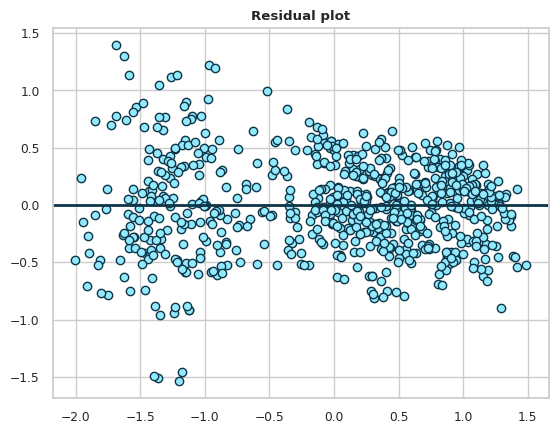

In [67]:
def model_creation (df, cols):
    X_cols = cols
    y_col = ["Life Expectancy World Bank"]

    X = df[X_cols].values
    y = df[y_col].values

    X_train, X_test, y_train, y_test =  train_test_split(X, y)

    sc_x = StandardScaler()
    sc_y = StandardScaler()
    sc_x.fit(X)
    sc_y.fit(y)

    X_train = sc_x.transform(X_train)
    X_test = sc_x.transform(X_test)
    y_train = sc_y.transform(y_train)
    y_test = sc_y.transform(y_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = metrics.mean_squared_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    print("mse:", mse.round(4))
    print("r2:", r2.round(4))
    
    model.intercept_ = model.intercept_[0] # Equivale a W0
    model.coef_ = model.coef_.reshape(-1)
    y_test = y_test.reshape(-1)
    print("============= Summary===============")
    stats.summary(model, X_test, y_test, X_cols)

    check_residuals (y_test, y_pred)

cols = list(set(df_test.columns)- set(["Life Expectancy World Bank"]))
model_creation(df = df_test, cols=cols)

In this case the R-squared: 0.83177 was lower in the df_test model than in the refined df_clear model R-squared: 0.85010.


___
### Dimensionality reduction
The hypothesis made is discarded and we do a dimensionality reduction with the variables with a significance level greater than 0.05

mse: 0.1538
r2: 0.8526
============= Summary===============
Residuals:
    Min      1Q  Median     3Q    Max
-1.1918 -0.2598 -0.0354 0.2645 1.4941


Coefficients:
                                   Estimate  Std. Error  t value   p value
_intercept                        -0.001307    0.014601  -0.0895  0.928715
Health Expenditure %               0.106699    0.017322   6.1596  0.000000
Year                               0.159892    0.015193  10.5242  0.000000
Unemployment                      -0.096479    0.016241  -5.9404  0.000000
Region_Sub-Saharan Africa         -0.478482    0.021964 -21.7850  0.000000
Communicable                      -0.135685    0.023395  -5.7997  0.000000
IncomeGroup_Low income            -0.346324    0.024507 -14.1317  0.000000
IncomeGroup_Lower middle income   -0.376611    0.021050 -17.8911  0.000000
NonCommunicable                    0.176171    0.039754   4.4316  0.000011
IncomeGroup_Upper middle income   -0.247835    0.021081 -11.7566  0.000000
CO2         

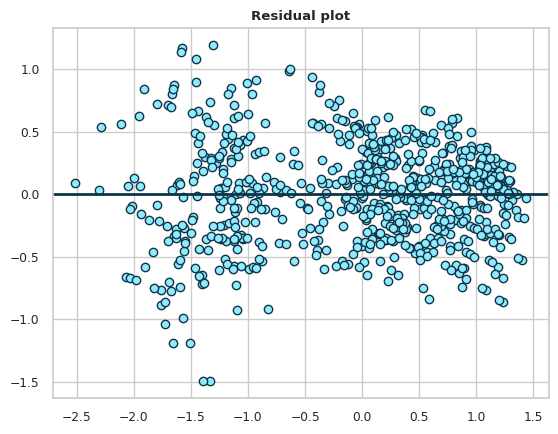

In [68]:
cols_reduc = ["Corruption", "Education Expenditure %", "Region_North America", "Region_Europe & Central Asia", "Region_South Asia", 
              "Injuries", "Life Expectancy World Bank", "Region_Latin America & Caribbean"]       

cols = list(set(df_clean.columns)- set(cols_reduc))
model_creation(df = df_clean, cols=cols)

___
**Conclusions**
* *An R-squared model is obtained: 0.85506, which corresponds to a model with good predictive qualities. Dimensionality reduction allowed the variables to generate p-values close to 0.*
* *Removing variables with p-values greater than 0.05 in the training model improves prediction accuracy*
* *It is necessary to normalize the numerical variables to reduce the impact of scale between the variables and at the same time the training of the model*